In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import matplotlib as mpl
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus


p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## What % of GENCODE v40 transcripts are <5 kb?

In [3]:
t_df, _, _ = get_gtf_info('iso',
                          ver='v40_cerberus',
                          subset='polya')
t_df = t_df[['t_len']]
t_df.rename({'t_len':'length'}, axis=1, inplace=True)
t_df['source'] = 'GENCODE v40 transcripts'

In [35]:
len_thresh = 7000
n_below = len(t_df.loc[t_df['length'] <= len_thresh].index)
n = len(t_df.index)
print('{:.2f}% of GENCODE transcripts ({}/{}) are <{}bp long'.format((n_below/n)*100,n_below,n,len_thresh))

97.62% of GENCODE transcripts (229951/235562) are <7000bp long


In [4]:
len_thresh = 10000
n_below = len(t_df.loc[t_df['length'] <= len_thresh].index)
n = len(t_df.index)
print('{:.2f}% of GENCODE transcripts ({}/{}) are <{}bp long'.format((n_below/n)*100,n_below,n,len_thresh))

99.33% of GENCODE transcripts (233982/235562) are <10000bp long


## KDE plot of read lengths

In [21]:
fname = 'human_talon_read_annot.tsv'
df = pd.read_csv(fname, usecols=[1,8], sep='\t') 

In [22]:
cell_lines = get_sample_datasets('cell_line')
tissues = get_sample_datasets('tissue')
df['source'] = False
df.loc[df.dataset.isin(cell_lines), 'source'] = 'Reads from cell lines'
df.loc[df.dataset.isin(tissues), 'source'] = 'Reads from tissues'

In [23]:
# df.tail()

In [24]:
t_df, _, _ = get_gtf_info('iso',
                          ver='v40_cerberus',
                          subset='polya')

In [25]:
df = df[['read_length', 'source']]
df.rename({'read_length': 'length'}, axis=1, inplace=True)
t_df = t_df[['t_len']]
t_df.rename({'t_len':'length'}, axis=1, inplace=True)
t_df['source'] = 'GENCODE v40 transcripts'
df = pd.concat([df, t_df])

In [26]:
xlim = 10000

In [27]:
df

,length,source
0,513,Reads from cell lines
1,512,Reads from cell lines
2,1111,Reads from cell lines
3,1109,Reads from cell lines
4,1111,Reads from cell lines
...,...,...
244849,442,GENCODE v40 transcripts
244850,2661,GENCODE v40 transcripts
244851,2787,GENCODE v40 transcripts
244852,598,GENCODE v40 transcripts


In [28]:
temp1 = df.loc[df.source=='GENCODE v40 transcripts']
temp2 = df.sample(1000000)
df_copy = df.copy(deep=True)
df = pd.concat([temp1, temp2])

In [29]:
df = df_copy.copy(deep=True)

<Figure size 108x144 with 0 Axes>

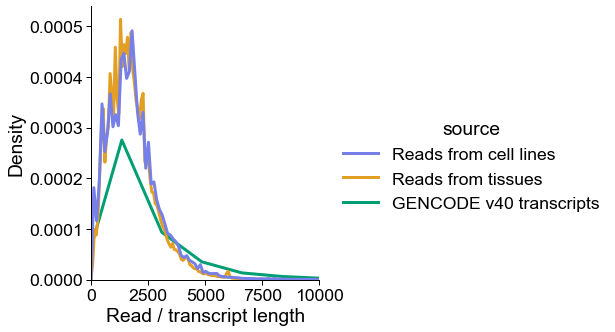

In [32]:
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(1.5, 2))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

temp_c_dict, order = get_ic_nov_colors()
c_dict = dict()
c_dict['GENCODE v40 transcripts'] = temp_c_dict['Known']
temp_c_dict, order = get_tissue_cell_line_colors()
c_dict['Reads from tissues'] = '#e39f24'
c_dict['Reads from cell lines'] = '#7680e8'
order = ['Reads from cell lines',
         'Reads from tissues',
         'GENCODE v40 transcripts']

ax = sns.displot(data=df, x='length', kind='kde',
                     linewidth=3, common_norm=False, hue='source',
                     palette=c_dict, hue_order=order)
xlabel = 'Read / transcript length'
ylabel = 'Density'

if xlim:
    _ = ax.set(xlabel=xlabel, ylabel=ylabel, xlim=(0,xlim))
else:
    _ = ax.set(xlabel=xlabel, ylabel=ylabel)

# plt.vlines(5000, ymin=0, ymax=5.5, colors='gray', linestyles='dashed')
fname = 'figures/read_vs_transcript_len.png'
plt.savefig(fname, dpi=500, bbox_inches='tight')
fname = 'figures/read_vs_transcript_len.pdf'
plt.savefig(fname, dpi=500, bbox_inches='tight')

In [31]:
len(df.index)

200254702